<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Sep30/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/olympic100m_men.txt",delimiter = ',').T
x=data[0]
y=data[1]

Mounted at /content/drive


In [108]:
x=(x-np.mean(x))/np.std(x)
y=(y-np.mean(y))/np.std(y)

array([ 3.11016532,  1.17882991,  1.17882991,  1.56509699,  0.79256283,
        0.79256283,  0.79256283,  0.40629575,  0.79256283, -0.17310488,
       -0.17310488, -0.17310488,  0.02002866,  0.2131622 , -0.36623842,
       -0.7525055 , -0.84907227, -0.48211854, -0.63662538, -0.26967165,
       -0.77181886, -0.90701233, -0.82975892, -1.06151917, -1.00357911,
       -1.04220581, -1.35121948])

$$P(\vec{\omega}|Data)\propto \ell (Data|\vec{\omega})Pr(\vec{\omega})$$

$$ln L \propto \sum_i(y_i-Model(x_i,\vec{\omega})^2$$

#no infomativo

$$pr(\theta)=\frac{1}{\theta_{max}-\theta_{min}}$$

#informativos

$$Pr(\theta)\propto e^{(\theta -\mu_\theta)^2/2\sigma^2_\theta}$$

$f=w_0+w_1x$ parametros libre $w_0,w_1$

$\sigma$

* 1) $\theta_{ini}=[]$
* 2) $\theta_{prop}=[gaussian(\theta_ini[0],\sigma),gaussian(\theta_ini[1],\sigma)]$
* 3) Evaluar $ln Post(\theta_{ini}), ln Post (theta_{prop})$
  * si $ln Post(\theta_{prop})>ln Post (theta_{ini})$
    * acepto $\theta_{prop}$
    * guardar $\theta_{prop}$
  * si no :
  * post= uniform (0,1)
  * si $ln post(\theta_{prop}) - ln post(\theta_{ini})> ln post(post)$
    * acepto $\theta_{prop}$
    * guardar $\theta_{prop}$
    * $\theta_{ini}= \theta_{prop}$


In [121]:
#modelo lienal
def model(x,theta):
  f = 0.0
  for i in range(len(theta)):
    f+= theta[i]*x[i]**i
  return f

#prior
def prior(lim,theta):
  if lim[0,1]> theta[0] >lim[0,0] and lim[1,1]> theta[1] >lim[1,0]:
    pr=1
  else:
    pr=0
  return pr

#likelihood
def likelihood(x,y,theta, model):
  lnL=0.0
  for i in range(len(x)):
    lnL += (y[i]-model(x,theta))**2
  return lnL

#Monte Carlo Markov Chain Metropolis Algorithm
# Cadenas de Markov Algoritmo Metropolos
def CM_AM(x,y,theta,sigma0,sigma1,lim,iter,model):
  # distribucion de theta
  dist_theta=[]
  dist_theta.append(theta)
  for i in range(iter):
    theta_prop=[np.random.normal(theta[0],sigma0),np.random.normal(theta[1],sigma1)]
    if lim[0,1]> theta_prop[0] >lim[0,0] and lim[1,1]> theta_prop[1] >lim[1,0]:
      # lnPost= ln L + ln Pr
      lnPost_prop=likelihood(x,y,theta_prop,model)+ np.log(prior(lim,theta_prop))
      lnPost_ini=likelihood(x,y,theta,model)+ np.log(prior(lim,theta))

      if lnPost_prop > lnPost_ini:
        dist_theta.append(theta_prop)
        theta=theta_prop
        print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')

      elif lnPost_prop-lnPost_ini >np.log(np.random.uniform(0,1)):
        dist_theta.append(theta_prop)
        theta=theta_prop
        print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')


  return dist_theta

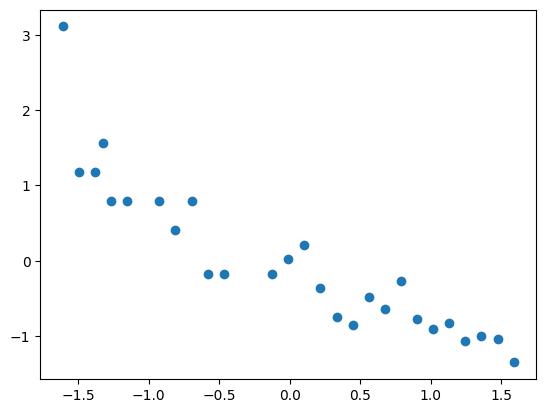

In [110]:
plt.scatter(x,y)

postirios: 0: theta[0.8047153601099444, -0.3176063159428204] : prop=71.22664134028841 : ini=27.000000000000007
postirios: 1: theta[0.5332540287212348, -0.5495205819287201] : prop=76.59714729877481 : ini=71.22664134028841
postirios: 6: theta[0.5796934871983734, -0.6669294994533316] : prop=94.1826073221255 : ini=76.59714729877481
postirios: 8: theta[0.5326962496119438, -0.7069944322695136] : prop=95.28934080709028 : ini=94.1826073221255
postirios: 10: theta[0.8439831697650464, -0.9973749444897003] : prop=174.34271703199872 : ini=95.28934080709028
postirios: 13: theta[0.6921638332398639, -1.1781544840472844] : prop=189.68696250011664 : ini=174.34271703199872
postirios: 14: theta[0.8132330812338886, -1.5326736588540784] : prop=287.4931802582547 : ini=189.68696250011664
postirios: 21: theta[0.621772675652153, -1.7662503448195235] : prop=314.6630941233694 : ini=287.4931802582547
postirios: 23: theta[0.7700172767414816, -1.7584275579509203] : prop=339.23333109440364 : ini=314.6630941233694
po

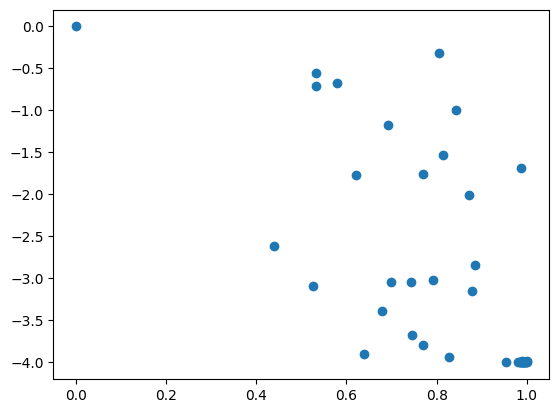

In [122]:
w0=0.0
w1=0.0
sigma0=0.25
sigma1=0.25
#iteracion
iter=100000
lim= np.asmatrix([[-1,1],[-4,4]])
theta=[w0,w1]
dis_theta=CM_AM(x,y,theta,sigma0,sigma1,lim,iter,model)
dis_theta=np.array(dis_theta).T
plt.scatter(dis_theta[0],dis_theta[1])

In [95]:
len(dis_theta.T)

11